In [1]:
# import gspread
# from gspread_dataframe import set_with_dataframe
# from google.oauth2.service_account import Credentials

# credentials = Credentials.from_service_account_file('D:/04.Uni_Related/L6/FYP/Photobuddy_Working_Version/credentials1.json', scopes=['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive'])
# gc = gspread.authorize(credentials)


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# # %tensorflow_version 1.x

# # import tensorflow as tf
# # from tensorflow import keras
# # # from keras.models import ModelCheckpoint
# # import numpy as np
# # from numpy import load
# # from numpy import zeros
# # from numpy import ones
# # from numpy.random import randint
# # from keras.initializers import RandomNormal
# # from keras.models import Sequential
# # from keras.layers import MaxPooling2D,UpSampling2D,ZeroPadding2D
# # from keras.layers import Conv2D, MaxPooling2D
# # from keras.layers import LeakyReLU
# # from keras.layers import Activation
# # from keras.layers import Concatenate
# # from keras.layers import Dropout
# # from keras.layers import BatchNormalization
# # from keras.layers import LeakyReLU
# # from keras import backend as K
# # from keras.optimizers import Adam, SGD


# # # from tensorflow.keras.callbacks import ModelCheckpoint
# # from os import listdir
# # from numpy import asarray
# # from numpy import vstack
# # from keras.preprocessing.image import img_to_array
# # from keras.preprocessing.image import load_img
# # from keras.utils import plot_model
# # from skimage.measure import compare_ssim
# # from keras.models import load_model
# # from keras.applications.nasnet import preprocess_input
# # from tensorflow import keras

# # from keras import losses
# # from keras.models import regularizers
# # from keras.models import l2
# # # from tensorflow.keras.regularizers import l2
# # import matplotlib.pyplot as plt

# # %pip install tensorflow keras

# # ------------------------------ old ^ -----------------------------------------

# # %tensorflow_version 1.x
# import tensorflow as tf
# import numpy as np
# from numpy import load
# from numpy import zeros
# from numpy import ones
# from numpy.random import randint
# from keras.initializers import RandomNormal
# from keras.models import Model
# from keras.models import Sequential
# from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,ZeroPadding2D
# from keras.layers import Conv2DTranspose
# from keras.layers import LeakyReLU
# from keras.layers import Activation
# from keras.layers import concatenate
# from keras.layers import Dropout
# from keras.layers import BatchNormalization
# from keras.layers import LeakyReLU
# from keras import backend as K
# from keras.optimizers import Adam,SGD
# from keras.callbacks import ModelCheckpoint
# from os import listdir
# from numpy import asarray
# from numpy import vstack
# from keras.preprocessing import image
# # from keras.preprocessing.image import img_to_array
# # from keras.preprocessing.image import load_img
# from keras.utils import plot_model
# from skimage import measure
# from skimage.measure import compare_ssim
# from keras.models import load_model
# from keras.applications.nasnet import preprocess_input
# from keras import losses
# from keras.regularizers import l2
# from keras.applications.mobilenet import mobilenet_v2
# from keras.applications import MobileNetV2


# # from keras.layers import Input
# from keras.models import Model
# from keras.layers import Conv2D, MaxPooling2D

# # def unet(input_size = (512, 512, 3)):
# #     from keras.layers import Input
# #     from keras.models import Model
# #     from keras.layers import Conv2D, MaxPooling2D
    

# #     inputs = Input(input_size,name='input_ids', dtype='float32')

# #     down1=unet_down_block(inputs,64)
# #     pool1 = MaxPooling2D(pool_size=(2, 2))(down1)

# #     down2=unet_down_block(pool1,128)
# #     pool2 = MaxPooling2D(pool_size=(2, 2))(down2)

# #     down3=unet_down_block(pool2,256)
# #     pool3 = MaxPooling2D(pool_size=(2, 2))(down3)

# #     down4=unet_down_block(pool3,512,True)
# #     pool4 = MaxPooling2D(pool_size=(2, 2))(down4)

# #     #Bottleneck Layer
# #     down5=unet_down_block(pool4,1024,True)
  
# #     up6=unet_up_block(down4,down5,512)

# #     up7=unet_up_block(down3,up6,256)

# #     up8=unet_up_block(down2,up7,128)

# #     up9=unet_up_block(down1,up8,64)

# #     convOut = Conv2D(3, 1, activation = 'sigmoid')(up9)

# #     model = Model(inputs,convOut)


# #     return model

# import matplotlib.pyplot as plt


In [1]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import MaxPooling2D,UpSampling2D,ZeroPadding2D
from keras.layers import concatenate

def unet_up_block(skip_layer,layer_in,n_filters):
    
    u_layer = Conv2D(n_filters, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(layer_in))
    merge_layer = concatenate([skip_layer,u_layer], axis = 3)
    u_layerconv = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge_layer)
    # u_layerconv = BatchNormalization()(u_layerconv)
    u_layerconv = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(u_layerconv)
    # u_layerconv = BatchNormalization()(u_layerconv)
    
    return u_layerconv

# def unet_up_block(skip_layer,layer_in,n_filters):
#     u_layer = Conv2D(n_filters, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(layer_in))
#     merge_layer = concatenate([skip_layer,u_layer], axis = 3)
#     u_layerconv = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge_layer)
#     # u_layerconv = BatchNormalization()(u_layerconv)
#     u_layerconv = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(u_layerconv)
#     # u_layerconv = BatchNormalization()(u_layerconv)
    
#     return u_layerconv
   

In [2]:

from keras.layers import concatenate

from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout

def unet_down_block(layer_in,n_filters,drop=False):   
    d_layer = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)
    # d_layer = BatchNormalization()(d_layer)
    d_layer = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d_layer)
    # d_layer = BatchNormalization()(d_layer)
    if drop:
      d_layer = Dropout(0.5)(d_layer)   
    return d_layer

# def unet_down_block(layer_in,n_filters,drop=False):
        
#     d_layer = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)
#     # d_layer = BatchNormalization()(d_layer)
#     d_layer = Conv2D(n_filters, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d_layer)
#     # d_layer = BatchNormalization()(d_layer)
#     if drop:
#       d_layer = Dropout(0.5)(d_layer)   
#     return d_layer
    
    

In [3]:
import numpy as np

def unetpp_block(layer_in,n_filters,drop=False):
       
  from keras.layers import Conv2D, MaxPooling2D
  from keras.layers import Dropout
  d_layer = Conv2D(n_filters,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)
 

  d_layer = Conv2D(n_filters,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)


  if drop==True:
     d_layer = Dropout(0.5)(d_layer)
  

  return d_layer

# def unetpp_block(layer_in,n_filters,drop=False):
    
#   d_layer = Conv2D(n_filters,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)
 

#   d_layer = Conv2D(n_filters,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)


#   if drop==True:
#      d_layer = Dropout(0.5)(d_layer)
  

#   return d_layer

In [4]:
from keras.layers import Conv2D, MaxPooling2D

def unetpp_skip(layer_in,n_filters):
    
    skip_layer_conc = Conv2D(n_filters,3,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)
    skip_layer_conc = BatchNormalization()(skip_layer_conc)

    skip_layer_conc = Conv2D(n_filters,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(skip_layer_conc)
    skip_layer_conc = BatchNormalization()(skip_layer_conc)
     

    
    return skip_layer_conc

# def unetpp_skip(layer_in,n_filters):
    
#     skip_layer_conc = Conv2D(n_filters,3,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(layer_in)
#     skip_layer_conc = BatchNormalization()(skip_layer_conc)

#     skip_layer_conc = Conv2D(n_filters,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(skip_layer_conc)
#     skip_layer_conc = BatchNormalization()(skip_layer_conc)
     

    
#     return skip_layer_conc

In [5]:
from keras.models import Model
import numpy as np
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose

def unetpp(input_size = (512,512,3)):

    # inputs = Input(input_size, name='input_ids', dtype='float32')
    inputs = Input(input_size)

    #First Row
    down1 = unetpp_block(inputs,64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(down1)
  
    down2 = unetpp_block(pool1,128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(down2)

    s1=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down2)
    s1_c = concatenate([down1,s1])
    s1_f=unetpp_block(s1_c,64)
    
    #Second Row
    down3= unetpp_block(pool2,256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(down3)

    s2=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down3)
    s2_c = concatenate([down2,s2])
    s2_f=unetpp_block(s2_c,64)

    s3=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s2_f)
    s3_c = concatenate([down1,s1_f,s3])
    s3_f=unetpp_block(s3_c,64)

    #Third Row
    down4= unetpp_block(pool3,512,True)
    pool4 = MaxPooling2D(pool_size=(2, 2))(down4)

    s4=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down4)
    s4_c = concatenate([down3,s4])
    s4_f=unetpp_block(s4_c,64)

    s5=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s4_f)
    s5_c = concatenate([down2,s2_f,s5])
    s5_f=unetpp_block(s5_c,64)

    s6=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s5_f)
    s6_c = concatenate([down1,s1_f,s3_f,s6])
    s6_f=unetpp_block(s6_c,64)

    #Bottleneck Layer
    down5=unetpp_block(pool4,1024,True)
     
    #Upsampling Layer 2
    s7=Conv2DTranspose(512,kernel_size=(2, 2),strides=(2, 2),padding='same')(down5)
    s7_c = concatenate([s7,down4])
    s7_f=unetpp_block(s7_c,512)
    
    #Upsampling Layer 2
    s8=Conv2DTranspose(256,kernel_size=(2, 2),strides=(2, 2),padding='same')(s7_f)
    s8_c = concatenate([s8,down3,s4_f])
    s8_f=unetpp_block(s8_c,256)

    #Upsampling Layer 3
    s9=Conv2DTranspose(128,kernel_size=(2, 2),strides=(2, 2),padding='same')(s8_f)
    s9_c = concatenate([s9,down2,s2_f,s5_f])
    s9_f=unetpp_block(s9_c,128)

    #Upsampling Layer 4
    s10=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s9_f)
    s10_c = concatenate([s10,down1,s1_f,s3_f,s6_f])
    s10_f=unetpp_block(s10_c,64)

    convOut = Conv2D(3, 1, activation = 'sigmoid')(s10_f)

    model = Model(input = inputs, output = convOut)


    # down1 = unetpp_block(inputs,64)
    # pool1 = MaxPooling2D(pool_size=(2, 2))(down1)
  
    # down2 = unetpp_block(pool1,128)
    # pool2 = MaxPooling2D(pool_size=(2, 2))(down2)

    # s1=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down2)
    # s1_c = concatenate([down1,s1])
    # s1_f=unetpp_block(s1_c,64)
    
    # #Second Row
    # down3= unetpp_block(pool2,256)
    # pool3 = MaxPooling2D(pool_size=(2, 2))(down3)

    # s2=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down3)
    # s2_c = concatenate([down2,s2])
    # s2_f=unetpp_block(s2_c,64)

    # s3=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s2_f)
    # s3_c = concatenate([down1,s1_f,s3])
    # s3_f=unetpp_block(s3_c,64)

    # #Third Row
    # down4= unetpp_block(pool3,512,True)
    # pool4 = MaxPooling2D(pool_size=(2, 2))(down4)

    # s4=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down4)
    # s4_c = concatenate([down3,s4])
    # s4_f=unetpp_block(s4_c,64)

    # s5=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s4_f)
    # s5_c = concatenate([down2,s2_f,s5])
    # s5_f=unetpp_block(s5_c,64)

    # s6=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s5_f)
    # s6_c = concatenate([down1,s1_f,s3_f,s6])
    # s6_f=unetpp_block(s6_c,64)

    # #Bottleneck Layer
    # down5=unetpp_block(pool4,1024,True)
     
    # #Upsampling Layer 2
    # s7=Conv2DTranspose(512,kernel_size=(2, 2),strides=(2, 2),padding='same')(down5)
    # s7_c = concatenate([s7,down4])
    # s7_f=unetpp_block(s7_c,512)
    
    # #Upsampling Layer 2
    # s8=Conv2DTranspose(256,kernel_size=(2, 2),strides=(2, 2),padding='same')(s7_f)
    # s8_c = concatenate([s8,down3,s4_f])
    # s8_f=unetpp_block(s8_c,256)

    # #Upsampling Layer 3
    # s9=Conv2DTranspose(128,kernel_size=(2, 2),strides=(2, 2),padding='same')(s8_f)
    # s9_c = concatenate([s9,down2,s2_f,s5_f])
    # s9_f=unetpp_block(s9_c,128)

    # #Upsampling Layer 4
    # s10=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s9_f)
    # s10_c = concatenate([s10,down1,s1_f,s3_f,s6_f])
    # s10_f=unetpp_block(s10_c,64)

    # convOut = Conv2D(3, 1, activation = 'sigmoid')(s10_f)

    # model = Model(inputs,convOut)


    # return model

# def unetpp(input_size = (512,512,3)):
#     inputs = Input(input_size)

#     #s-skip layer
#     #s_c-skip layer concatanated
#     #s_f-final skip layer

#     #First Row
#     down1 = unetpp_block(inputs,64)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(down1)
  
#     down2 = unetpp_block(pool1,128)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(down2)

#     s1=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down2)
#     s1_c = concatenate([down1,s1])
#     s1_f=unetpp_block(s1_c,64)
    
#     #Second Row
#     down3= unetpp_block(pool2,256)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(down3)

#     s2=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down3)
#     s2_c = concatenate([down2,s2])
#     s2_f=unetpp_block(s2_c,64)

#     s3=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s2_f)
#     s3_c = concatenate([down1,s1_f,s3])
#     s3_f=unetpp_block(s3_c,64)

#     #Third Row
#     down4= unetpp_block(pool3,512,True)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(down4)

#     s4=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(down4)
#     s4_c = concatenate([down3,s4])
#     s4_f=unetpp_block(s4_c,64)

#     s5=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s4_f)
#     s5_c = concatenate([down2,s2_f,s5])
#     s5_f=unetpp_block(s5_c,64)

#     s6=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s5_f)
#     s6_c = concatenate([down1,s1_f,s3_f,s6])
#     s6_f=unetpp_block(s6_c,64)

#     #Bottleneck Layer
#     down5=unetpp_block(pool4,1024,True)
     
#     #Upsampling Layer 2
#     s7=Conv2DTranspose(512,kernel_size=(2, 2),strides=(2, 2),padding='same')(down5)
#     s7_c = concatenate([s7,down4])
#     s7_f=unetpp_block(s7_c,512)
    
#     #Upsampling Layer 2
#     s8=Conv2DTranspose(256,kernel_size=(2, 2),strides=(2, 2),padding='same')(s7_f)
#     s8_c = concatenate([s8,down3,s4_f])
#     s8_f=unetpp_block(s8_c,256)

#     #Upsampling Layer 3
#     s9=Conv2DTranspose(128,kernel_size=(2, 2),strides=(2, 2),padding='same')(s8_f)
#     s9_c = concatenate([s9,down2,s2_f,s5_f])
#     s9_f=unetpp_block(s9_c,128)

#     #Upsampling Layer 4
#     s10=Conv2DTranspose(64,kernel_size=(2, 2),strides=(2, 2),padding='same')(s9_f)
#     s10_c = concatenate([s10,down1,s1_f,s3_f,s6_f])
#     s10_f=unetpp_block(s10_c,64)

#     convOut = Conv2D(3, 1, activation = 'sigmoid')(s10_f)

#     model = Model(input = inputs, output = convOut)


#     return model


In [6]:
from keras.layers import Input
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D


def unet(input_size = (512, 512, 3)):    

    # inputs = Input(input_size,name='input_ids', dtype='float32')
    inputs = Input(input_size)

    down1=unet_down_block(inputs,64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(down1)

    down2=unet_down_block(pool1,128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(down2)

    down3=unet_down_block(pool2,256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(down3)

    down4=unet_down_block(pool3,512,True)
    pool4 = MaxPooling2D(pool_size=(2, 2))(down4)

    #Bottleneck Layer
    down5=unet_down_block(pool4,1024,True)
  
    up6=unet_up_block(down4,down5,512)

    up7=unet_up_block(down3,up6,256)

    up8=unet_up_block(down2,up7,128)

    up9=unet_up_block(down1,up8,64)

    convOut = Conv2D(3, 1, activation = 'sigmoid')(up9)

    model = Model(inputs,convOut)


    return model

# from keras.layers import Input

# def unet(input_size = (512,512,3)):
#     inputs = Input(input_size)

#     down1=unet_down_block(inputs,64)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(down1)

#     down2=unet_down_block(pool1,128)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(down2)

#     down3=unet_down_block(pool2,256)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(down3)

#     down4=unet_down_block(pool3,512,True)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(down4)

#     #Bottleneck Layer
#     down5=unet_down_block(pool4,1024,True)
  
#     up6=unet_up_block(down4,down5,512)

#     up7=unet_up_block(down3,up6,256)

#     up8=unet_up_block(down2,up7,128)

#     up9=unet_up_block(down1,up8,64)

#     convOut = Conv2D(3, 1, activation = 'sigmoid')(up9)

#     model = Model(input = inputs, output = convOut)


#     return model


In [7]:
#No Excecution
def ssim_loss(y_true, y_pred):
  loss_rec = tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))
  #final_loss= 1 - (1 + loss_rec ) /2
  return loss_rec

# #No Excecution
# def ssim_loss(y_true, y_pred):
#   loss_rec = tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))
#   #final_loss= 1 - (1 + loss_rec ) /2
#   return loss_rec

In [8]:
from keras.applications import MobileNetV2

nima_model = MobileNetV2(weights=None, include_top=True)

#No Excecution
def mean_score(scores):
  si = K.arange(1, 11, 1)
  sc= K.cast(scores, 'float32')
  si= K.cast(si, 'float32')
  mean = K.sum(sc * si)
  return mean

def std_score(scores):
  si = K.arange(1, 11, 1)
  mean = mean_score(scores)
  si=K.cast(si, 'float32')
  mean=K.cast(mean, 'float32')
  std = K.sqrt(K.sum(((si - mean) ** 2) * scores))
  return std

def NIMA_Loss(y_true,y_pred):
  gamma=0.0001
  #Pre-processing y-pred before sending to the NIMA model
  num_ex = K.shape(y_pred)[0]
  y_img=tf.image.resize(y_pred,(224,224))
  #Getting Predicted score from NIMA model
  y_p = nima_model(K.reshape(y_img, (num_ex,224,224,3)))
  scores=y_p
  #Getting Final predicted score
  finalScore=mean_score(scores)+std_score(scores)
  #Getting Final Loss
  finalLoss=losses.mean_absolute_error(y_true,y_pred)+gamma*(10-finalScore)

  return finalLoss

#No Excecution

# from keras.applications import MobileNetV2

# nima_model = MobileNetV2(weights=None, include_top=True)

# def mean_score(scores):
#   si = K.arange(1, 11, 1)
#   sc= K.cast(scores, 'float32')
#   si= K.cast(si, 'float32')
#   mean = K.sum(sc * si)
#   return mean

# def std_score(scores):
#   si = K.arange(1, 11, 1)
#   mean = mean_score(scores)
#   si=K.cast(si, 'float32')
#   mean=K.cast(mean, 'float32')
#   std = K.sqrt(K.sum(((si - mean) ** 2) * scores))
#   return std

# def NIMA_Loss(y_true,y_pred):
#   gamma=0.0001
#   #Pre-processing y-pred before sending to the NIMA model
#   num_ex = K.shape(y_pred)[0]
#   y_img=tf.image.resize(y_pred,(224,224))
#   #Getting Predicted score from NIMA model
#   y_p = nima_model(K.reshape(y_img, (num_ex,224,224,3)))
#   scores=y_p
#   #Getting Final predicted score
#   finalScore=mean_score(scores)+std_score(scores)
#   #Getting Final Loss
#   finalLoss=losses.mean_absolute_error(y_true,y_pred)+gamma*(10-finalScore)

#   return finalLoss

In [9]:
import tensorflow
from tensorflow import keras
from keras.layers import Input

def unet_converter(input_shape=(512, 512, 3)):
    inputs = Input(input_shape)

    print("Working0001")

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    print("Working0002"
          )
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    print("Working0003")
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    print("Working0004")

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    print("Working0005")

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    print("Working0006")

    # Decoder
    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    print("Working0007")

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')

# import numpy as np


# def train_model():
    
#     print("Loading Data")
    
#     dataset = load_real_samples('D:/FYP/Phaedra_BE/imagedata.npz')
   
#     img_in,img_out = dataset[0],dataset[1]
#     model=unet()
    
#     print("Finished Loading Data")

#     model.summary()
#       #loss=NIMA_Loss
#     model.compile(optimizer=adam(lr=0.00002, beta_1=0.9,beta_2=0.999), loss='mean_absolute_error', metrics=['accuracy'])

#     print('Fitting model')

#     history=model.fit(img_in, img_out, batch_size=3, epochs=40, verbose=1,validation_split=0.1)

#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('Unet accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()
#     plt.savefig('Unet_Accuracy.png')
#     # "Loss"
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Unet loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()
#     plt.savefig('Unet_Loss.png')
      
   
#     return model

# def load_real_samples(filename):

# 	data = np.load(filename)
# 	X1, X2 = data["raw_images"],data["edited_images"]
# 	return [X1, X2]

# def load_real_samples(filename):
#   data = np.load(filename)
#   X1, X2 = data["raw_images"],data["edited_images"]
#   return [X1, X2]

In [10]:
import numpy as np
from keras import backend as K
import tensorflow as tf
import cv2
import imageio

from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout

from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import backend as K

from keras.layers import Lambda

from matplotlib import pyplot as plt

def train_model():
    
    print("Loading Data01")
    
    
    # dataset = load_real_samples('D:/04.Uni_Related/L6/FYP/Photobuddy_Working_Version/Dataset') 
    # dataset = load_real_samples('D:/04.Uni_Related/L6/FYP/Photobuddy_Working_Version/Fyp_BE/imagedata.npz')
    # dataset = np.load('D:/FYP/Phaedra_BE/imagedata.npz') 
    # print(dataset.files)

    #specifiy the path
    dataset = load_real_samples('D:/FYP/Phaedra_BE/imagedata_final.npz') 
    filename = 'D:/FYP/Phaedra_BE/imagedata_final.npz'
    print("Dataset Obtained")

    # #load the file
    # data = np.load(filename)

    # print("Loading Data03")

    img_in,img_out = dataset[0],dataset[1] 

     
    print("Dataset Assigned")

    model=unet()
    
    print("Unet Section Done")

    model.summary()
      #loss=NIMA_Loss

    print("Model Summary Displayed")

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0002, beta_1=0.9,beta_2=0.999), loss='mean_absolute_error', metrics=['accuracy'])

    print('Fitting model')

    history=model.fit(img_in, img_out, batch_size=3, epochs=40, verbose=1,validation_split=0.1)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Unet accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.savefig('Unet_Accuracy.png')
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Unet loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.savefig('Unet_Loss.png')
      
   
    return model

    # print("Adding reshape layer")

    # # reshape_layer = keras.layers.Reshape((512, 512, 3), input_shape=(4000, 1800, 3))
    
    # # model = keras.models.Sequential([reshape_layer] + model.layers)

    
    # print("before merge")

    # merged_inputs = Lambda(pad_images)([dataset[0], dataset[1]])

    # print("after merge")

    # # ----------------------------------------Works Unti This Point ------------------------------------------

    # unet_converter()

    # print("after converter")


# def load_real_samples(filename, target_size=(512, 512)):
#       data = np.load(filename)
#       X1, X2 = data["raw_images"], data["edited_images"]
#       X1_resized = []
#       X2_resized = []
#       for i in range(X1.shape[0]):
#           img1 = cv2.resize(X1[i], target_size)
#           img2 = cv2.resize(X2[i], target_size)
#           X1_resized.append(img1)
#           X2_resized.append(img2)
#       return [np.array(X1_resized), np.array(X2_resized)]

# def pad_images(x):
#     # get the difference in shape
#     diff = x[0].shape[2] - x[1].shape[2]
#     # pad the second image along the width dimension
#     padded = tf.pad(x[1], ((0, 0), (0, 0), (0, diff), (0, 0)), mode='constant', constant_values=0)
#     return [x[0], padded]

def load_real_samples(filename):
  data = np.load(filename)
  X1, X2 = data['arr_0'], data['arr_1']
  
  return [X1, X2]
    



Loading Data01
Dataset Obtained
Dataset Assigned
Unet Section Done
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 64  36928       ['conv2d[0][0]']                 
                           

c:\Users\Ph03nix6\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fitting model
Epoch 1/40
108/108 [==============================] - 1799s 17s/step - loss: 0.7087 - accuracy: 0.6021 - val_loss: 0.6791 - val_accuracy: 0.4498
Epoch 2/40
108/108 [==============================] - 1821s 17s/step - loss: 0.7081 - accuracy: 0.6201 - val_loss: 0.6791 - val_accuracy: 0.4498
Epoch 3/40
108/108 [==============================] - 1831s 17s/step - loss: 0.7081 - accuracy: 0.6201 - val_loss: 0.6791 - val_accuracy: 0.4498
Epoch 4/40
108/108 [==============================] - 1829s 17s/step - loss: 0.7081 - accuracy: 0.6201 - val_loss: 0.6791 - val_accuracy: 0.4498
Epoch 5/40
108/108 [==============================] - 1806s 17s/step - loss: 0.7081 - accuracy: 0.6201 - val_loss: 0.6791 - val_accuracy: 0.4498
Epoch 6/40
108/108 [==============================] - 1837s 17s/step - loss: 0.7081 - accuracy: 0.6200 - val_loss: 0.6791 - val_accuracy: 0.4498
Epoch 7/40
108/108 [==============================] - 1877s 17s/step - loss: 0.7081 - accuracy: 0.6201 - val_loss: 0

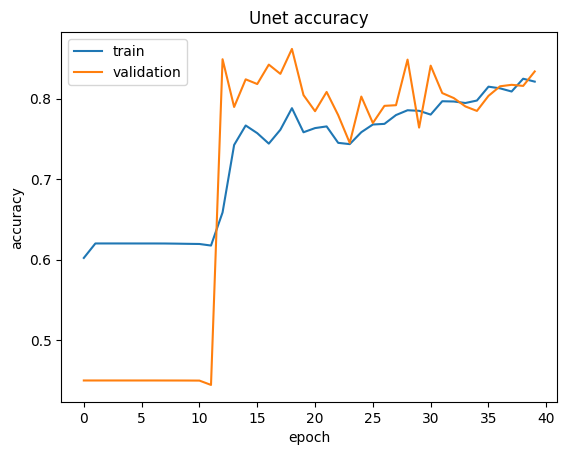

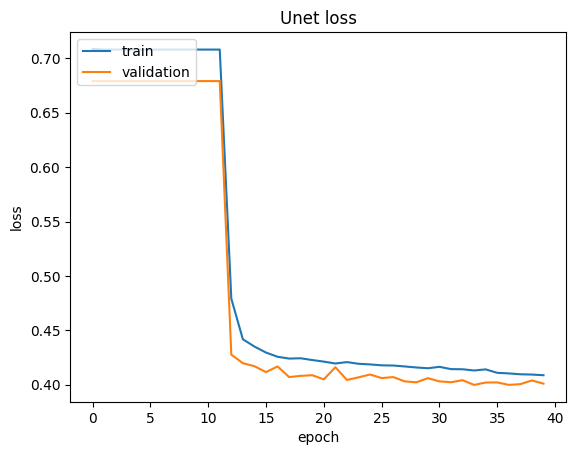

<Figure size 640x480 with 0 Axes>

In [11]:
model=train_model()

In [12]:
model.save('EnhancementModel2_up.h5')

In [ ]:
#Model has been saved ^^^

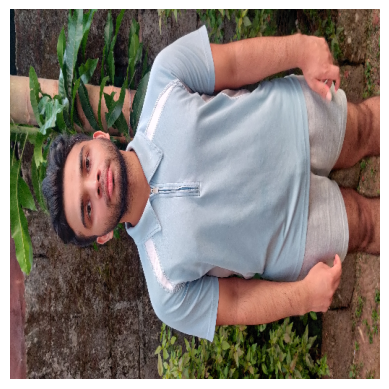

1/1 [==============================] - 1s 1s/step


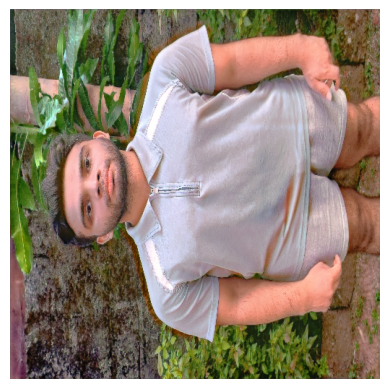

In [7]:
from keras.models import load_model

# from keras.preprocessing import image
import keras.utils as image
from numpy import load
from numpy import expand_dims

from tensorflow import keras

from keras.utils import img_to_array
from keras.utils import load_img

# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import load_img

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

def load_image(img_path, show=False):
    
    img = load_img(img_path, target_size=(512, 512))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
    
img_path = 'D:/FYP/Phaedra_BE/test1.jpg'   

# dataset = load_real_samples('/content/drive/My Drive/uned2ed.npz')
# dataset[0] = dataset[0].reshape(dataset[0].shape[1:])
# dataset[1] = dataset[1].reshape(dataset[1].shape[1:])
    
# img_in,img_out = dataset[0],dataset[1]
      
model = keras.models.load_model('D:/FYP/Phaedra_BE/EnhancementModel2_up.h5')
new_image = load_image(img_path,show=True)
#load_image('/content/moodypics[50].JPEG',show=True)
gen_image = model.predict(new_image)
# scale from [-1,1] to [0,1]
# gen_image = (gen_image + 1) / 2.0

gen_image=gen_image.reshape(gen_image.shape[1:])

#cv2.imwrite("gen.jpg",gen_image)

plt.imshow(gen_image)
plt.axis('off')
plt.show()

In [8]:

def validate_image(self):
    validate_image = cv2.imread(self.uploadedImage)
    face_detector = MTCNN()
    faces_n = face_detector.detect_faces(validate_image)
    print(len(faces_n))
    if len(faces_n) == 1:
        return True
    else:
        return False

In [2]:

# import library
import imageio

def enhance_image(self, sent_parameter, savepath, o_filename):

    if sent_parameter == "happy":
        happyModel = load_model(self.happypath)
        gen_image = happyModel.predict(self.processedImage)
        gen_image = gen_image.reshape(gen_image.shape[1:])
    elif sent_parameter == "sad":
        sadModel = load_model(self.sadpath)
        gen_image = sadModel.predict(self.processedImage)
        gen_image = gen_image.reshape(gen_image.shape[1:])

        final_image = cv2.resize(gen_image,
                                 (int(self.orig_image.shape[1] / 2), int(self.orig_image.shape[0] / 2)),
                                 interpolation=cv2.INTER_AREA)
        final_image = cv2.normalize(final_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

        final_name = "enh_" + o_filename

        temp_path = os.path.join(savepath, final_name)

        imageio.imwrite(temp_path, final_image)

        return temp_path